<a href="https://colab.research.google.com/github/samuelhernandez99/SpatialModelingTutorials/blob/main/Notebooks/CostaRica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install geemap

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
!pip install geemap

# Import packages

In [48]:
#import packages
import geopandas as gpd, pandas as pd, os, numpy as np
import ee, geemap

## Authenticate and Initialize the project

In [49]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-samh') #you will want to select your personal cloud project

# Read the shape file into a geodataframe
## Display CRS and column names

### If running on Colab you will need to upload the Clasification_Plot.zip file

In [50]:
gdf=gpd.read_file('/content/drive/MyDrive/work_stuff/Clasification_Plots.zip')
display(gdf.crs)
display(gdf.columns)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Index(['Source.Nam', 'plotid', 'sampleid', 'lon', 'lat', 'sample_geo', 'Uso',
       'Cobertura', 'Vegetacion', 'Herbaceas', 'Pasto_Arb', 'Cultivo',
       'Humedal', 'Terreno', 'Agua', 'Otra_clase', 'SAF', 'Cambios15_',
       'Gana_Perdi', 'geometry'],
      dtype='object')

## Subset the geodataframe to the columns we are interested in and display the dataframe

In [51]:
k_clms = ['plotid','sampleid','Vegetacion','Herbaceas', 'Pasto_Arb', 'Cultivo','Humedal', 'Terreno','Agua','Otra_clase','SAF','Cambios15_','Gana_Perdi','geometry']
gdf_s=gdf[k_clms]
gdf_s


,plotid,sampleid,Vegetacion,Herbaceas,Pasto_Arb,Cultivo,Humedal,Terreno,Agua,Otra_clase,SAF,Cambios15_,Gana_Perdi,geometry
0,2900,11597,Arboles,None,None,None,None,None,None,None,None,No se determina,None,POINT (-84.90887 10.87476)
1,2900,11598,Herbaceas,Gramineas,Pastos mezclados (70-90%),None,None,None,None,None,None,No se determina,None,POINT (-84.90887 10.87519)
2,2900,11599,Herbaceas,Gramineas,Pastos mezclados (70-90%),None,None,None,None,None,None,No se determina,None,POINT (-84.90887 10.87561)
3,2900,11600,Arboles,None,None,None,None,None,None,None,None,No se determina,None,POINT (-84.90844 10.87476)
4,2900,11601,Arboles,None,None,None,None,None,None,None,None,No se determina,None,POINT (-84.90844 10.87519)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101155,904894,3619577,Arboles,None,None,None,None,None,None,None,None,No se determina,None,POINT (-83.84296 10.02921)
101156,904894,3619578,Arboles,None,None,None,None,None,None,None,None,No se determina,None,POINT (-83.84296 10.02964)
101157,904894,3619579,Arboles,None,None,None,None,None,None,None,None,No se determina,None,POINT (-83.84253 10.02879)
101158,904894,3619580,Arboles,None,None,None,None,None,None,None,None,No se determina,None,POINT (-83.84253 10.02921)


## Display summary statistics

In [52]:
display(gdf_s.describe())
display(gdf.describe(include='object'))

,plotid,sampleid
count,101160.000000,1.011600e+05
mean,86794.497420,3.471790e+05
std,258528.659228,1.034115e+06
min,2.000000,5.000000e+00
25%,2830.750000,1.132300e+04
50%,5636.500000,2.254700e+04
75%,8445.250000,3.378300e+04
max,910231.000000,3.640929e+06


,Source.Nam,sample_geo,Uso,Cobertura,Vegetacion,Herbaceas,Pasto_Arb,Cultivo,Humedal,Terreno,Agua,Otra_clase,SAF,Cambios15_,Gana_Perdi
count,101160,101160,100944,100944,94158,24465,23291,8398,3926,5558,887,5449,8398,100944,3232
unique,10,91917,7,5,7,3,3,10,5,3,2,6,3,3,2
top,ceo-ACAHN-puntos-Mapa-de-tipos-de-Bosque-y-otr...,POINT(-84.90887419133645 10.874761552334505),Bosque,Vegetacion,Arboles,Gramineas,Pastos mezclados (70-90%),Otro,Pantano (Palustre),Otras superficies,Continentales,Suelo desnudo,Cultivo Puro (90-100%),No,Perdida de Bosque
freq,10125,2,58708,94158,61011,20984,12637,2569,1592,2187,818,2721,5217,90237,1774


## Make GeoSeries of the study area and create convex hull

In [53]:
chul=gpd.GeoSeries(gdf_s.unary_union.convex_hull,crs=gdf_s.crs)

## Create definitions for the median and medoid procedures

In [54]:
def maskL8sr(image):
    # Bit 0 - Fill
    # Bit 1 - Dilated Cloud
    # Bit 2 - Cirrus
    # Bit 3 - Cloud
    # Bit 4 - Cloud Shadow
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    # Apply the scaling factors to the appropriate bands.
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    #Replace the original bands with the scaled ones and apply the masks.
    return image.addBands(opticalBands, overwrite=True).addBands(thermalBands, overwrite=True).updateMask(qaMask).updateMask(saturationMask)

def median_mosaic(image,fltr=None,refl_bands=['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2']):
    if(fltr is None):
        inCollection = image.filter(fltr).select(refl_bands)
    else:
        inCollection = image.filter(fltr).select(refl_bands)

    return inCollection.median()

def _medoid(col):
    median = ee.ImageCollection(col).median()
    diff=ee.Image(col).subtract(median).pow(ee.Image.constant(2))
    return diff.reduce('sum').addBands(col)


def medoid_mosaic(image, fltr,refl_bands=['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2']):
    if(fltr is None):
        inCollection = image.filter(fltr).select(refl_bands)
    else:
        inCollection = image.filter(fltr).select(refl_bands)

    medoid = inCollection.map(_medoid)
    medoid = ee.ImageCollection(medoid).reduce(ee.Reducer.min(7)).select([1,2,3,4,5,6], refl_bands)
    return medoid



## Set various variable and create the mdoid surface on ee

In [55]:
#make lists fo band names for selections
lc8_bands = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'ST_B10', 'QA_PIXEL']#landsat band names
tgt_bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2', 'TEMP', 'QA_PIXEL']#common band names
refl_bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2']#bands we care about

#specify start and end dates for the image filter
startDate = '2021-01-01'
endDate = '2024-07-01'

#Specify julian dates for filter. Here we want to select sunny months
julianStart1 = 350# Starting Julian Date (for landsat median cloud free )
julianEnd1 = 365
julianStart2 = 1
julianEnd2 = 150# Ending Julian date (for landsat median cloud free)

#define the study area extent from our convex hull
#geo=geemap.gdf_to_ee(gpd.GeoDataFrame(geometry=chul)) #convert our convex hull into a ee feature class object

#make the ee collection
l8_col=ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')

#set various filters
#f_bnds=ee.Filter.bounds(geometry=geo)
f_date=ee.Filter.date(startDate,endDate)
f_cr1=ee.Filter.calendarRange(julianStart1,julianEnd1)
f_cr2=ee.Filter.calendarRange(julianStart2,julianEnd2)
f_or=ee.Filter.Or(f_cr1,f_cr2)
f_and=ee.Filter.And(f_date,f_or)

#use our filter on the landsat collection
l8=l8_col.filter(f_and).map(maskL8sr)
l8r=l8.select(lc8_bands,tgt_bands)

#call the medoid function
medoid = medoid_mosaic(l8r,fltr=f_and,refl_bands=refl_bands)

## Create a generic Map using geemap and then map the DEM and Medoid surface

In [56]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Add the EE layers to the map

In [57]:
# get the dem from EE
dem = ee.Image("USGS/SRTMGL1_003")

# Set visualization parameters for the map.
vis_params = {
    "min": 0,
    "max": 4000,
    "palette": ["006633", "E5FFCC", "662A00", "D8D8D8", "F5F5F5"],
}

#Add Earth Engine layers to Map
Map.addLayer(
    medoid, {"bands": ["RED", "GREEN", "BLUE"],
             'min':-0.02,
             'max':0.3
    },
    "Landsat 8",
)

Map.addLayer(dem, vis_params, "SRTM DEM", True, 1)

## Extract DEM and Medoid pixel values

### Due to memory limitation on EE, we will need to subset our data and send multiple requests
#### Let's start with making a function to handle splitting up the data

In [58]:
def get_tiles(gdf,ntiles):
    chul=gpd.GeoSeries(gdf.unary_union.convex_hull,crs=gdf.crs)
    xmin,ymin,xmax,ymax=chul.total_bounds
    sp=(np.sqrt(chul.area/ntiles))[0]
    sp2=(sp/2)
    xs=np.arange(xmin-sp2,xmax+sp2,sp)
    ys=np.arange(ymin-sp2,ymax+sp2,sp)
    xv, yv = np.meshgrid(xs, ys)
    xv = xv.flatten()
    yv = yv.flatten()
    pnts = gpd.GeoSeries(gpd.points_from_xy(x=xv, y=yv),crs=gdf.crs)
    buff = pnts.buffer(sp2,cap_style='square')
    buff = buff[buff.intersects(gdf.unary_union)]
    return buff

def extract_data(gdf,img,ntiles,stats='FIRST',scale=30):
    '''
    Iteratively calls EE and extracts data from the image
    gdf = (geodataframe) of features used to extract values
    img = (ee image object) ee image to extract values from
    ntiles = (int) number of tiles used to extract data at a time
    column_names = (list[string]) list of column names to for output dataframe
    stats= (string) name of the ee static (e.g., FIRST, MEAN, MAX, MIN, MEDIAN, etc.)

    returns a Dataframe of values (one record for each observation in the gdf)
    '''
    tls=get_tiles(gdf,ntiles)
    ogdf=gdf.copy()
    for t in tls:
        sel=ogdf.intersects(t)
        sdf=ogdf[['geometry']][sel]
        #use try and except catch errors
        try:
            fc=geemap.gdf_to_ee(sdf) #convert your subset geodataframe into a ee feature class object
            outfc=geemap.extract_values_to_points(fc,img,stats_type=stats,scale=scale) #extract the image values for each point location.
            ogdf2=geemap.ee_to_gdf(outfc).drop(['geometry'],axis=1) #convert your output ee object into a geodataframe
            column_names=ogdf2.columns
            ogdf.loc[sel,column_names]=ogdf2.values #update records of our geodataframe
        except Exception as e:
            print('Error: ',e)

    return ogdf #return the geodataframe


### Let's extract our dem and medoid data

In [ ]:
#get dem values
dem_tbl=extract_data(gdf_s,dem,100) #no reducers can take bigger tiles (less ram on server to process)
medoid_tbl=extract_data(gdf_s,medoid,500) #need to increase tiles to account for reducers (ram limits on server)
display(dem_tbl)
display(medoid_tbl)
#How many calls to EE?


KeyboardInterrupt: 

## Let's create our other predictor surfaces (pred2)

In [59]:
# get NDVI from medoid
ndvi = medoid.normalizedDifference(['NIR', 'RED']).rename('ndvi')

#evi
evi = medoid.expression('2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
                        {
                            'NIR': medoid.select('NIR'),
                            'RED': medoid.select('RED'),
                            'BLUE': medoid.select('BLUE')
                        }).rename('evi')

#savi
savi = medoid.expression('(NIR - RED) / (NIR + RED + .5) * (1 + .5)',
                         {
                             'NIR': medoid.select('NIR'),
                             'RED': medoid.select('RED')
                         }).rename('savi')


#diff index
diff = medoid.select('NIR').subtract(medoid.select('RED')).rename('diff')

#Tasseled cap
coefficients = {
  'brightness': [0.3029, 0.2786, 0.4733, 0.5599, 0.508, 0.1872],
  'greenness': [-0.2941, -0.243, -0.5424, 0.7276, 0.0713, -0.1608],
  'wetness': [0.1511, 0.1973, 0.3283, 0.3407, -0.7117, -0.4559],
}

#Calculate Tasseled Cap The band order is Blue, Green, Red, NIR, SWIR1, SWIR2.
brightness = medoid.select(['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2']).multiply(coefficients['brightness']).reduce('sum').rename('brightness')
greenness = medoid.select(['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2']).multiply(coefficients['greenness']).reduce('sum').rename('greenness')
wetness = medoid.select(['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2']).multiply(coefficients['wetness']).reduce('sum').rename('wetness')

#Elevation and derivatives
# Calculate terrain layers
slope = ee.Terrain.slope(dem)
aspect = ee.Terrain.aspect(dem).rename('aspect')

# Aspect transforms
aspectDeg = aspect.unitScale(-180, 180).rename('aspectdeg')
cosAspect = aspectDeg.cos().rename('aspectcos')
sinAspect = aspectDeg.sin().rename('aspectsin')

#Canopy Height
altura2 = ee.Image('users/nlang/ETH_GlobalCanopyHeight_2020_10m_v1').rename(['altura2'])

#Height above nearest drainage
hand30_100 = ee.ImageCollection("users/gena/global-hand/hand-100").mosaic().rename(['hand30_100'])

#soils
clay_1mMed = ee.Image("projects/soilgrids-isric/clay_mean").unmask(0).multiply([.05,.10,.15,.30,.40,0]).reduce('sum').rename('clay_1mMed')
sand_1mMed = ee.Image("projects/soilgrids-isric/sand_mean").unmask(0).multiply([.05,.10,.15,.30,.40,0]).reduce('sum').rename('sand_1mMed')
silt_1mMed = ee.Image("projects/soilgrids-isric/silt_mean").unmask(0).multiply([.05,.10,.15,.30,.40,0]).reduce('sum').rename('silt_1mMed')
ocs_1mMed = ee.Image("projects/soilgrids-isric/ocs_mean").unmask(0).multiply([.05,.10,.15,.30,.40,0]).reduce('sum').rename('ocs_1mMed')

#LAI
wgs_500m_8d = ee.ImageCollection("projects/sat-io/open-datasets/BU_LAI_FPAR/wgs_500m_8d")
fparProc = wgs_500m_8d.filter(f_and).median().select('FPAR').multiply(0.01).unmask(0).rename('fpar')
laiProc = wgs_500m_8d.filter(f_and).median().select('LAI').multiply(0.01).unmask(0).rename('lai')

#Topograghic indices
topDIV = ee.Image('CSP/ERGo/1_0/Global/SRTM_topoDiversity').add(1323.63).rename('topDiv')
mTPI = ee.Image("CSP/ERGo/1_0/Global/SRTM_mTPI").add(8129).rename('mTPI')

#make a list of predictors
pred2_lst=[medoid,dem,savi,diff,evi,brightness,wetness,ndvi,slope,aspect,
           aspectDeg,cosAspect,sinAspect,altura2,clay_1mMed,sand_1mMed,silt_1mMed,
           ocs_1mMed,fparProc,laiProc,hand30_100,topDIV,mTPI]

# let's combine our pred2 surfaces into one Raster
pred2=ee.Image(pred2_lst)

In [60]:
ndvi = medoid.normalizedDifference(['NIR', 'RED']).rename('ndvi')
evi = medoid.expression(
    '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
    {'NIR': medoid.select('NIR'), 'RED': medoid.select('RED'), 'BLUE': medoid.select('BLUE')}
).rename('evi')
savi = medoid.expression(
    '(NIR - RED) / (NIR + RED + 0.5) * (1 + 0.5)',
    {'NIR': medoid.select('NIR'), 'RED': medoid.select('RED')}
).rename('savi')


In [61]:
import matplotlib.pyplot as plt

# Initialize Earth Engine (if not already done)
ee.Initialize()

# Define a region (adjust based on your area of interest)
region = ee.Geometry.BBox(-84.92, 10.87, -84.90, 10.89)  # Example bounding box

# Function to extract values from a GEE Image
def extract_values(image, region, scale=30, num_samples=500):
    # Sample pixels within the given region
    sampled = image.sample(region=region, scale=scale, numPixels=num_samples)
    # Convert to dictionary and extract values from 'features'
    features = sampled.aggregate_array(image.bandNames().getInfo()[0]).getInfo()
    return np.array(features)

# Extract NDVI, EVI, and SAVI values
ndvi_values = extract_values(ndvi, region)
evi_values = extract_values(evi, region)
savi_values = extract_values(savi, region)

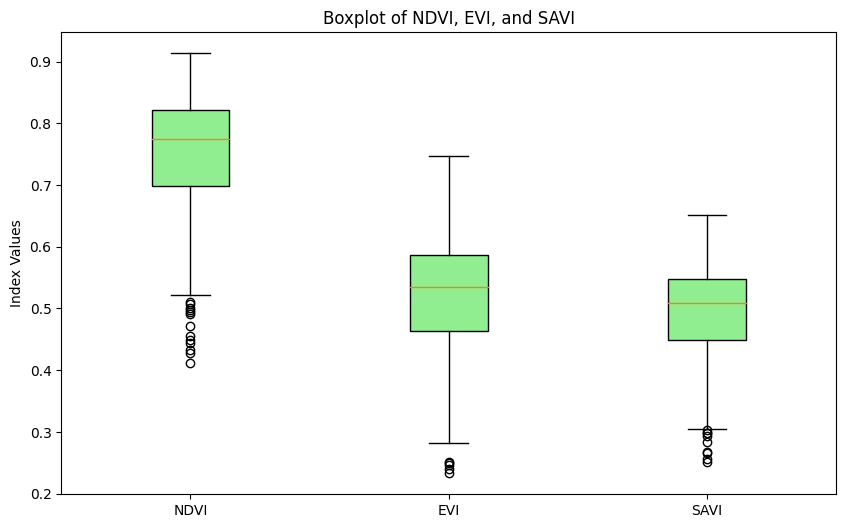

In [62]:
# Combine the values into a list for plotting
data = [ndvi_values, evi_values, savi_values]

# Plot the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

# Set x-axis labels
plt.xticks([1, 2, 3], ['NDVI', 'EVI', 'SAVI'])

# Add title and labels
plt.title('Boxplot of NDVI, EVI, and SAVI')
plt.ylabel('Index Values')

# Display the plot
plt.show()


*   NDVI : Measures the health of vegetation by comparing the difference between near-infrared (NIR) and red light reflected by plants.
*   EVI : An improved version of NDVI, designed to reduce atmospheric interference and be more sensitive to areas with dense vegetation.
*   SAVI : Similar to NDVI but adjusted to account for soil brightness, making it more effective in areas with sparse vegetation.

The outliers could represent unusual vegetation conditions or anomalies, such as areas with unexpected plant health, soil exposure, or measurement errors, which may indicate environmental changes, disturbances, or data inconsistencies.



Outliers found at indices: [ 7  8 22 25 31 49 51 52 65 82]


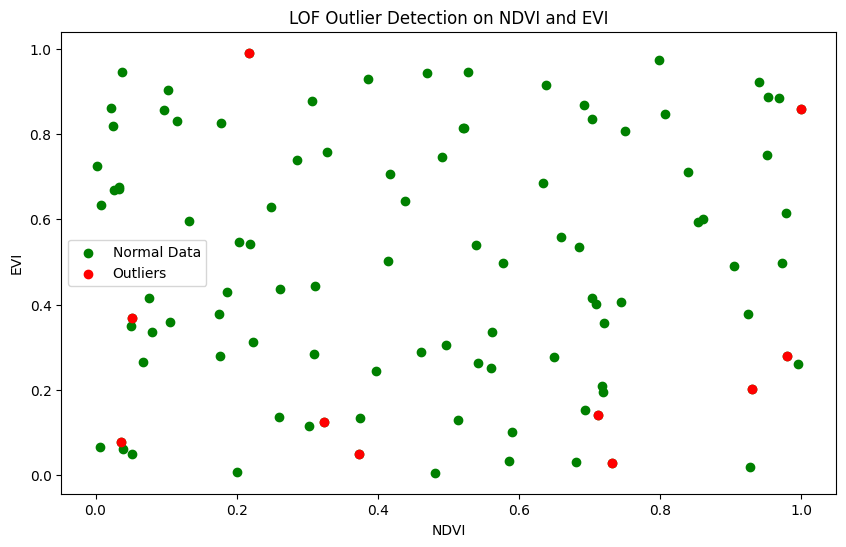

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Sample data: NDVI, EVI, SAVI values (replace with your extracted data)
ndvi_values = np.random.random(100)  # Replace with actual ndvi_values
evi_values = np.random.random(100)   # Replace with actual evi_values
savi_values = np.random.random(100)  # Replace with actual savi_values

# Combine NDVI, EVI, SAVI into a single dataset (rows = samples, columns = features)
data = np.column_stack((ndvi_values, evi_values, savi_values))

# Initialize the LOF model (n_neighbors = 5 is typical)
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

# Fit the model and predict outliers (-1 = outlier, 1 = inlier)
outlier_labels = lof.fit_predict(data)

# Find outliers
outlier_indices = np.where(outlier_labels == -1)[0]

print(f"Outliers found at indices: {outlier_indices}")

# Plot NDVI vs EVI with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c='green', label='Normal Data')  # NDVI vs EVI
plt.scatter(data[outlier_indices, 0], data[outlier_indices, 1], c='red', label='Outliers')
plt.xlabel('NDVI')
plt.ylabel('EVI')
plt.title('LOF Outlier Detection on NDVI and EVI')
plt.legend()
plt.show()


*   Green Points: Represent normal data points where the relationship between NDVI (plant health) and EVI (enhanced vegetation index) follows expected patterns.
*   Red Points: Identified as outliers by the Local Outlier Factor (LOF), meaning these points have unusual relationships between NDVI and EVI compared to their neighbors, possibly indicating environmental anomalies or errors.
*   This chart helps detect areas or data points with unexpected vegetation conditions, useful for identifying disturbances, outliers due to atmospheric interference, or areas requiring further investigation.

In [65]:
# Initialize Earth Engine
ee.Initialize()

# Define your region of interest
region = ee.Geometry.BBox(-84.92, 10.87, -84.90, 10.89)  # Adjust to your study area

# Function to sample values from multiple GEE images
def extract_values(images, region, scale=30):
    data = []
    for image in images:
        sampled = image.sample(region=region, scale=scale).aggregate_array(image.bandNames().getInfo()[0]).getInfo()
        data.append(np.array(sampled))
    return np.column_stack(data)  # Combine into a 2D array

# Prepare your slope and aspect images
images = [slope, aspect]

# Extract the values
terrain_data = extract_values(images, region)

# Verify the extracted data shape
print("Extracted Terrain Data Shape:", terrain_data.shape)


Extracted Terrain Data Shape: (5476, 2)


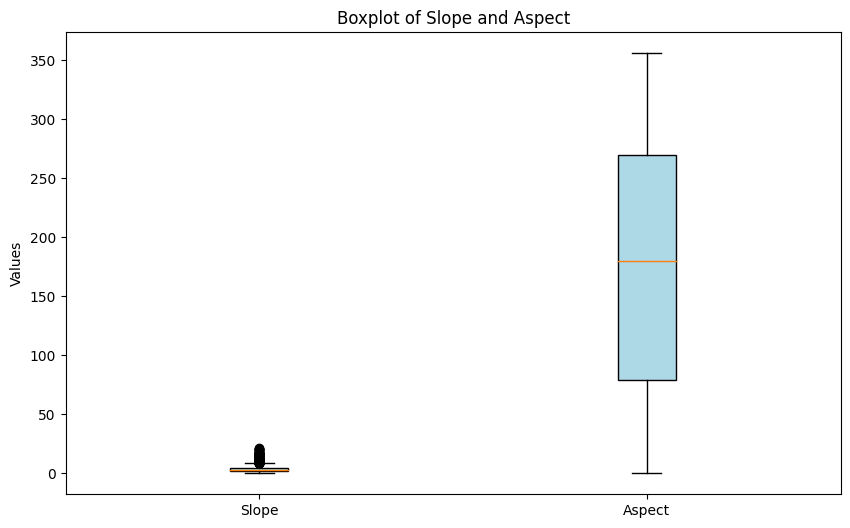

In [66]:
slope_values = terrain_data[:, 0]
aspect_values = terrain_data[:, 1]

# Prepare data for the boxplot
terrain_data_list = [slope_values, aspect_values]

# Plot the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(terrain_data_list, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Set x-axis labels
plt.xticks([1, 2], ['Slope', 'Aspect'])

# Add title and labels
plt.title('Boxplot of Slope and Aspect')
plt.ylabel('Values')

# Display the plot
plt.show()

*   Shows the distribution of slope values, with most data points near low slopes, and a few outliers identified (black circles) representing steep or unusual slopes.
*   Displays the distribution of aspect values, which represent the compass direction that the slope faces (0° to 360°). The spread shows that aspect values are widely distributed, with no significant outliers.
*   The slope values are clustered tightly, with many outliers, suggesting mostly flat terrain with a few steep spots. The aspect distribution indicates a broad range of directions for slope orientation.

Outliers detected at indices: [  13   91   92  106  125  135  137  138  139  151  164  174  176  190
  207  211  212  217  218  219  243  248  254  261  265  267  280  296
  301  331  343  351  368  373  380  381  389  395  405  410  416  417
  431  432  433  434  442  444  453  469  474  475  480  497  498  515
  518  519  522  528  533  542  545  583  584  602  615  628  667  675
  683  688  689  690  703  708  709  712  713  714  715  721  728  738
  741  747  750  751  765  779  781  785  792  793  812  819  875  890
  897  914  921  937  943  949  972  975  984  991 1040 1041 1044 1047
 1050 1053 1054 1061 1071 1072 1073 1075 1076 1077 1078 1079 1080 1081
 1085 1086 1090 1093 1095 1097 1098 1102 1104 1106 1269 1272 1275 1280
 1283 1288 1289 1294 1296 1316 1324 1331 1332 1368 1376 1382 1434 1435
 1447 1448 1451 1462 1467 1474 1478 1479 1480 1481 1488 1489 1502 1506
 1518 1526 1527 1549 1584 1585 1596 1615 1629 1640 1641 1682 1690 1691
 1692 1705 1707 1708 1719 1756 1777 1778 1781 1

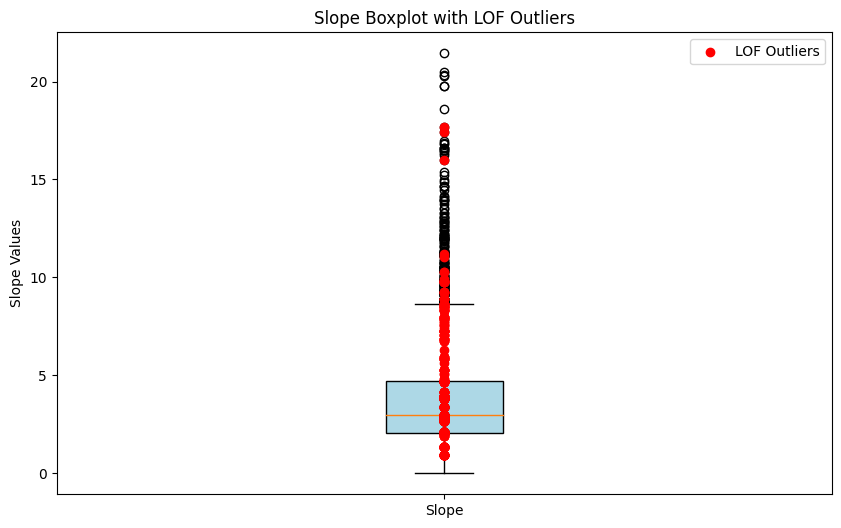

In [69]:
from sklearn.neighbors import LocalOutlierFactor

# Prepare slope values for LOF
slope_data = slope_values.reshape(-1, 1)  # Reshape for LOF (n_samples, n_features)

# Apply LOF with suitable neighbors and contamination
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
outlier_labels = lof.fit_predict(slope_data)

# Identify the outliers (label == -1)
outlier_indices = np.where(outlier_labels == -1)[0]
print(f"Outliers detected at indices: {outlier_indices}")

# Plot the slope boxplot again with LOF-confirmed outliers in red
plt.figure(figsize=(10, 6))
plt.boxplot(slope_values, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Overlay LOF outliers in red
plt.scatter(np.full_like(outlier_indices, 1), slope_values[outlier_indices],
            color='red', label='LOF Outliers', zorder=3)

# Add labels and title
plt.xticks([1], ['Slope'])
plt.title('Slope Boxplot with LOF Outliers')
plt.ylabel('Slope Values')
plt.legend()

# Show the plot
plt.show()


Black Circles: These are statistical outliers detected by the boxplot based on the spread (points beyond 1.5 × IQR from the quartiles).


Red Circles: These are outliers detected using Local Outlier Factor (LOF), which identifies points with low local density compared to their neighbors.


Overlap: Some points are marked by both methods, but others may only appear with one method due to the different ways they detect outliers (spread vs. density).

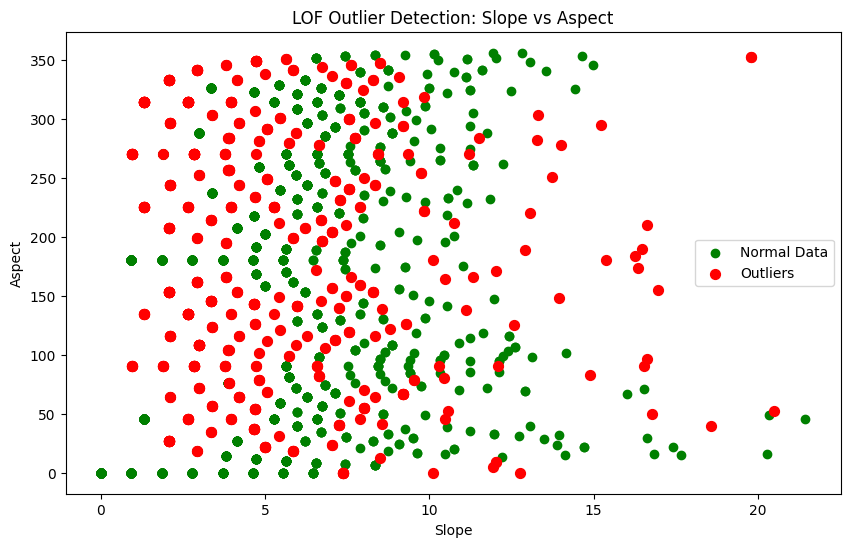

In [67]:
from sklearn.neighbors import LocalOutlierFactor

# Combine slope and aspect values for LOF
combined_terrain_data = np.column_stack([slope_values, aspect_values])

# Apply LOF to detect outliers
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
outlier_labels = lof.fit_predict(combined_terrain_data)

# Identify the outliers
outlier_indices = np.where(outlier_labels == -1)[0]

# Scatter plot for Slope vs Aspect
plt.figure(figsize=(10, 6))

# Plot normal points in green
plt.scatter(slope_values, aspect_values, c='green', label='Normal Data')

# Plot outliers in red
plt.scatter(
    slope_values[outlier_indices], aspect_values[outlier_indices],
    c='red', label='Outliers', marker='o', s=50
)

# Add labels and title
plt.xlabel('Slope')
plt.ylabel('Aspect')
plt.title('LOF Outlier Detection: Slope vs Aspect')
plt.legend()

# Show the plot
plt.show()


LOF helps highlight areas with unexpected relationships between slope and aspect, possibly indicating unusual terrain or errors in the data.
